# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [154]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [155]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}'
    
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | vorgashor
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | arkhangel'sk
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | lebedyan'
Processing Record 11 of Set 1 | lazaro cardenas
Processing Record 12 of Set 1 | watampone
Processing Record 13 of Set 1 | tevriz
Processing Record 14 of Set 1 | oranjemund
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | miguel aleman (la doce)
City not found. Skipping...
Processing Record 19 of Set 1 | zaozersk
Processing Record 20 of Set 1 | port elizabeth
Processing

Processing Record 36 of Set 4 | utrik
Processing Record 37 of Set 4 | kigoma
Processing Record 38 of Set 4 | nova gradiska
Processing Record 39 of Set 4 | zaragoza
Processing Record 40 of Set 4 | kloulklubed
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | kailua-kona
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | brooksville
Processing Record 45 of Set 4 | usakos
Processing Record 46 of Set 4 | daru
Processing Record 47 of Set 4 | al qusayr
Processing Record 48 of Set 4 | middelburg
Processing Record 49 of Set 4 | greymouth
Processing Record 0 of Set 5 | wenling
Processing Record 1 of Set 5 | tehuitzingo
Processing Record 2 of Set 5 | genhe
Processing Record 3 of Set 5 | flin flon
Processing Record 4 of Set 5 | tangalle
Processing Record 5 of Set 5 | toliara
Processing Record 6 of Set 5 | xichang
Processing Record 7 of Set 5 | tual
Processing Record 8 of Set 5 | la punta
Processing Record 9 of Set 5 | basco
Processing Record 10 of Se

Processing Record 26 of Set 8 | nosy varika
Processing Record 27 of Set 8 | usogorsk
Processing Record 28 of Set 8 | cannonvale
Processing Record 29 of Set 8 | muynoq
Processing Record 30 of Set 8 | port alfred
Processing Record 31 of Set 8 | paracuru
Processing Record 32 of Set 8 | kirensk
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | nuku'alofa
Processing Record 35 of Set 8 | nishinoomote
Processing Record 36 of Set 8 | brisas de zicatela
Processing Record 37 of Set 8 | sur
Processing Record 38 of Set 8 | ponta delgada
Processing Record 39 of Set 8 | punta del este
Processing Record 40 of Set 8 | polyarnyy
Processing Record 41 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 42 of Set 8 | praya
Processing Record 43 of Set 8 | epinay-sur-orge
Processing Record 44 of Set 8 | mount isa
Processing Record 45 of Set 8 | port douglas
Processing Record 46 of Set 8 | inderbor
Processing Record 47 of Set 8 | hafar al-batin
Processing Record 48 of Set 8 

Processing Record 14 of Set 12 | saint simons island
City not found. Skipping...
Processing Record 15 of Set 12 | merrill
Processing Record 16 of Set 12 | rodino
Processing Record 17 of Set 12 | caleta de carquin
Processing Record 18 of Set 12 | tianpeng
Processing Record 19 of Set 12 | saint johnsbury
Processing Record 20 of Set 12 | arpacay
Processing Record 21 of Set 12 | la malbaie
Processing Record 22 of Set 12 | guerrero negro
Processing Record 23 of Set 12 | kurchum
Processing Record 24 of Set 12 | gisborne
Processing Record 25 of Set 12 | san rafael
Processing Record 26 of Set 12 | shenjiamen
Processing Record 27 of Set 12 | guariba
Processing Record 28 of Set 12 | versailles
Processing Record 29 of Set 12 | bac lieu
Processing Record 30 of Set 12 | gassol
Processing Record 31 of Set 12 | nabire
Processing Record 32 of Set 12 | tangier
Processing Record 33 of Set 12 | san nicolas
Processing Record 34 of Set 12 | fig tree
Processing Record 35 of Set 12 | broken hill
Processing R

In [156]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [157]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,299.62,62,0,2.57,US,1690158511
1,edinburgh of the seven seas,-37.0676,-12.3116,286.57,79,38,11.39,SH,1690158753
2,vorgashor,67.5833,63.9500,287.59,94,89,3.68,RU,1690158753
3,waitangi,-43.9535,-176.5597,287.49,95,100,0.45,NZ,1690158754
4,arkhangel'sk,64.5401,40.5433,283.55,94,100,2.12,RU,1690158754


In [158]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [159]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,299.62,62,0,2.57,US,1690158511
1,edinburgh of the seven seas,-37.0676,-12.3116,286.57,79,38,11.39,SH,1690158753
2,vorgashor,67.5833,63.9500,287.59,94,89,3.68,RU,1690158753
3,waitangi,-43.9535,-176.5597,287.49,95,100,0.45,NZ,1690158754
4,arkhangel'sk,64.5401,40.5433,283.55,94,100,2.12,RU,1690158754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

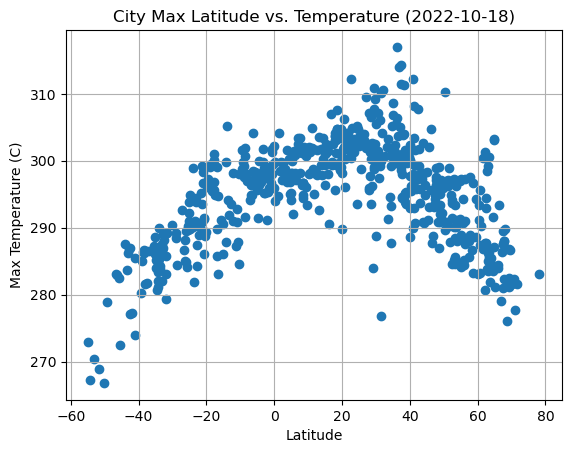

In [160]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x,y)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')

plt.xlabel('Latitude')

plt.ylabel('Max Temperature (C)')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

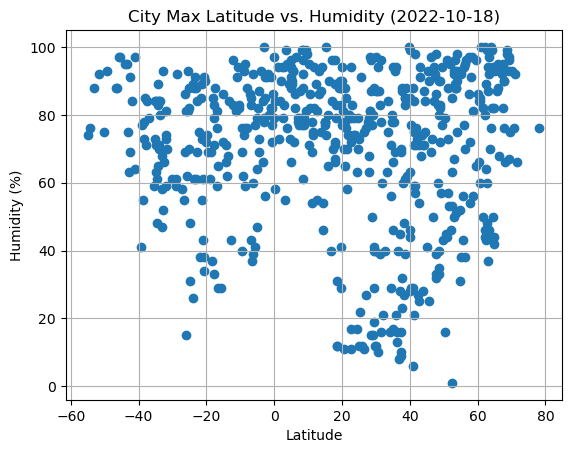

In [161]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')

plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

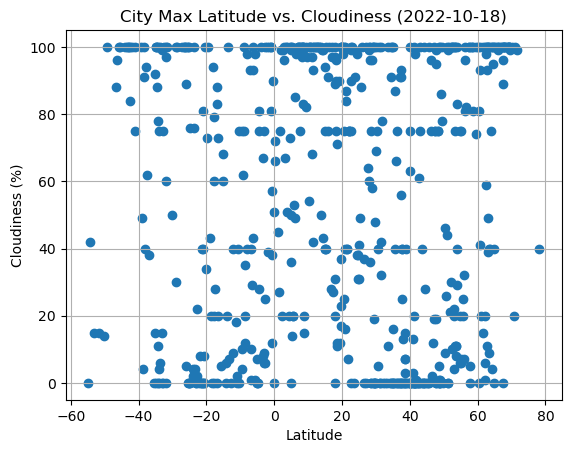

In [162]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')

plt.xlabel('Latitude')

plt.ylabel('Cloudiness (%)')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

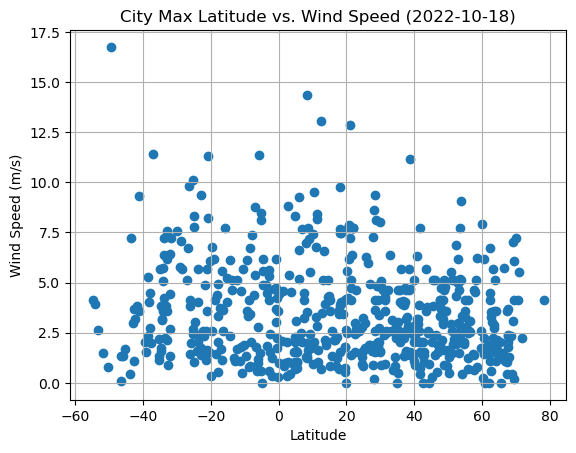

In [163]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y)
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2022-10-18)')

plt.xlabel('Latitude')

plt.ylabel('Wind Speed (m/s)')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [164]:
# Define a function to create Linear Regression plots
from linearreggression import linreg


In [183]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,299.62,62,0,2.57,US,1690158511
2,vorgashor,67.5833,63.9500,287.59,94,89,3.68,RU,1690158753
4,arkhangel'sk,64.5401,40.5433,283.55,94,100,2.12,RU,1690158754
5,anadyr,64.7500,177.4833,287.04,82,100,2.00,RU,1690158754
7,tiksi,71.6872,128.8694,281.58,66,99,2.26,RU,1690158755


In [184]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,286.57,79,38,11.39,SH,1690158753
3,waitangi,-43.9535,-176.5597,287.49,95,100,0.45,NZ,1690158754
6,ushuaia,-54.8000,-68.3000,272.96,74,0,4.12,AR,1690158755
10,watampone,-4.5386,120.3279,299.90,73,81,4.86,ID,1690158756
12,oranjemund,-28.5500,16.4333,284.48,92,100,5.66,NaN,1690158757


###  Temperature vs. Latitude Linear Regression Plot

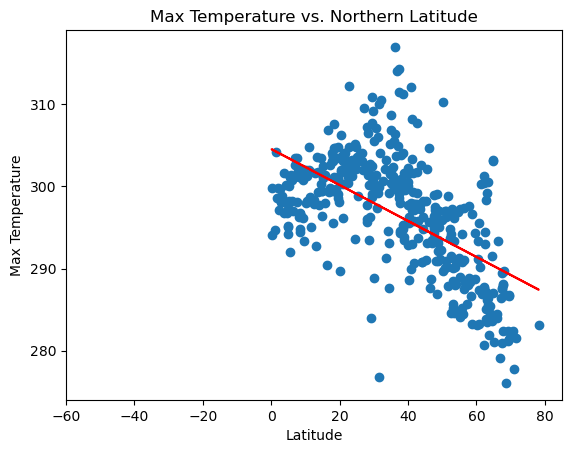

The r-value is: -0.5940281035110513


In [195]:
# Linear regression on Northern Hemisphere
northern_hemisphere_plt_maxTemp = linreg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature', 'Max Temperature vs. Northern Latitude')

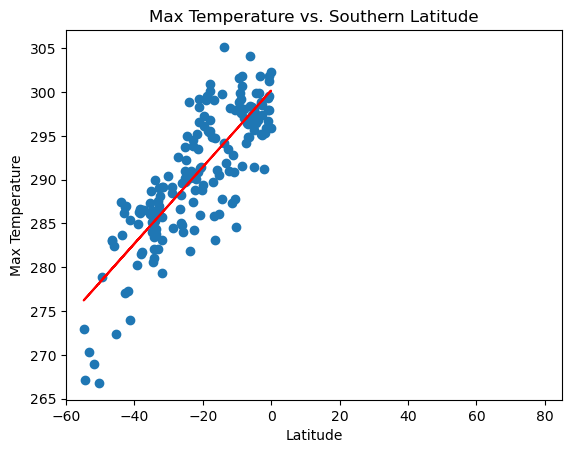

The r-value is: 0.8258697861175004


In [196]:
# Linear regression on Southern Hemisphere
southern_hemisphere_plt_maxTemp = linreg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature', 'Max Temperature vs. Southern Latitude')


**Discussion about the linear relationship:** For the Northern hemisphere there is a negative relationship between the Maximum temperature and the further you get away from the Equator. The r-value for the Northern hemisphere is -0.59.  For the Southern hemisphere there is a negative relationship (even though the slope is positive) between the Maximum temperature and the further you get from the Equator.  The r-value for the Southern hemisphere is around 0.82 meaning there is a strong correlation between Maximum temperature and the further away from the equator you go.  Both the Northern and Southern hemispheres show that the further from the equator you go either Southernly or Northernly, the Max Temperature will start to drop.

### Humidity vs. Latitude Linear Regression Plot

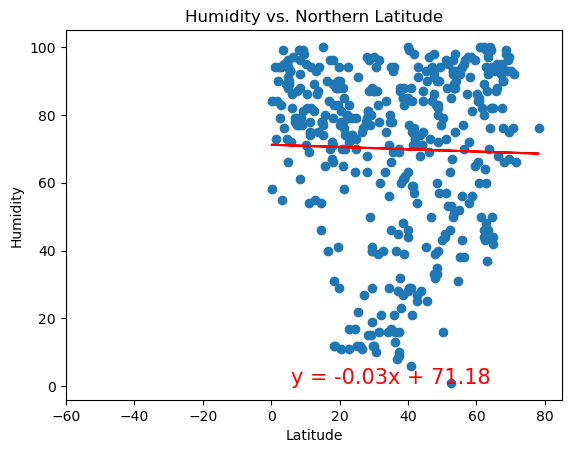

The r-value is: -0.026332081748352384


In [197]:
# Northern Hemisphere
northern_hemisphere_plt_humidity = linreg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Humidity vs. Northern Latitude')


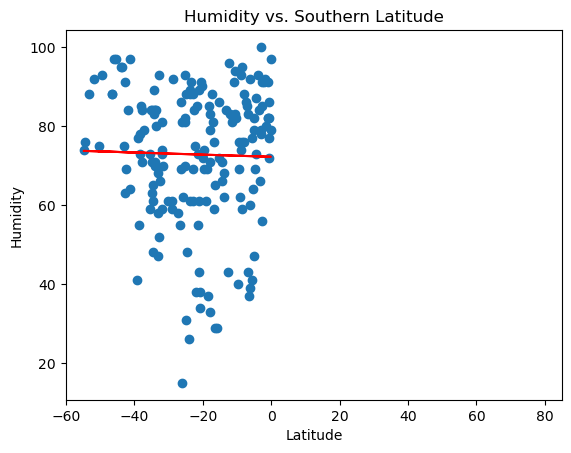

The r-value is: -0.02210857591019922


In [198]:
# Southern Hemisphere
southern_hemisphere_plt_humidity = linreg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Humidity vs. Southern Latitude')


**Discussion about the linear relationship:** Between the Northern and Southern hemispheres there really isnt much difference between the amount of rain (or humidity).  This is shown by the Northern r-value being -0.026 and the Southern hemisphere r-value being -0.022 which is very close to zero meaning there isn't much correlation.

### Cloudiness vs. Latitude Linear Regression Plot

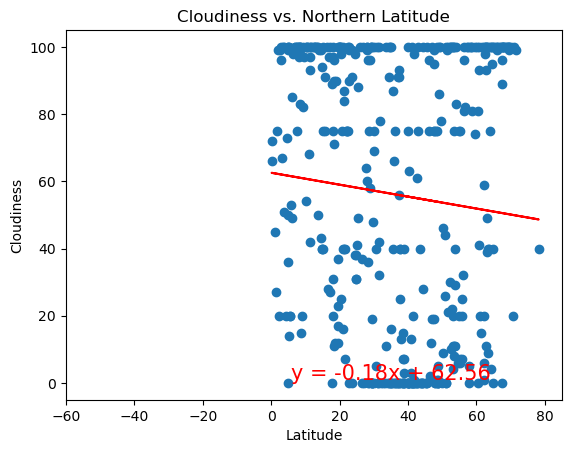

The r-value is: -0.08449798200580615


In [199]:
# Northern Hemisphere
northern_hemisphere_plt_humidity = linreg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Cloudiness vs. Northern Latitude')


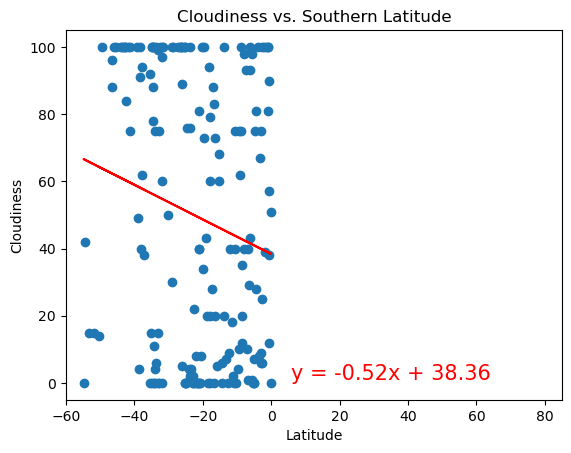

The r-value is: -0.17743730453973539


In [200]:
# Southern Hemisphere
southern_hemisphere_plt_humidity = linreg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Cloudiness vs. Southern Latitude')


**Discussion about the linear relationship:** Again between the Northern and Southern hemisphere's there doesn't appear to be much differnce between the amount of cloud cover.  The r-value's for both the Northern and Southern hemisphere's are very close to 0 representing little to no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

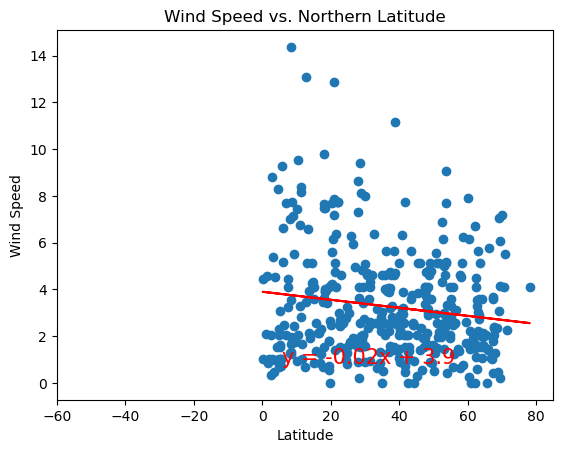

The r-value is: -0.1468545158391317


In [201]:
# Northern Hemisphere
northern_hemisphere_plt_humidity = linreg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Wind Speed vs. Northern Latitude')


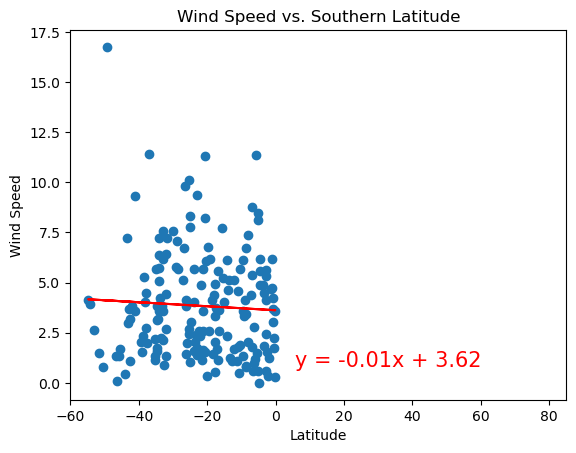

The r-value is: -0.05241402521480421


In [202]:
# Southern Hemisphere
southern_hemisphere_plt_humidity = linreg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Wind Speed vs. Southern Latitude')


**Discussion about the linear relationship:** Again between the Northern and Southern hemisphere's there doesn't appear to be much differnce between Wind Speed.  The r-value's for both the Northern and Southern hemisphere's are very close to 0 representing little to no correlation.  